In [6]:
import sys
sys.path.append("../")
import numpy as np 
from pypde import *
from navier import rbc2d
from stabdict import StabDict,fname_from_Ra

folder = "linear/"
# Store Results in Dictionary
Ra_dict = StabDict(fname=folder+"linear.txt")

# Default Navier Stokes Settings
ns_settings = {
    "adiabatic": False,
    "shape" : (196,196),
    #"shape" : (64,64),
    "dt" : 0.1,
    "tsave" : 5.0,
    "Pr" : 1.0,
    "dealias" : True,
    "integrator" : "rk3",
    "beta" : 1.0,
    "aspect" : 1.0,
}

# Default Newton-LGMRES Settings
ne_settings = {
    "maxiter" : 1200,
    "tol" : 1e-8,
    "jac_options": {"inner_maxiter":30},
}

# Default Stability Settings
st_settings = {
    "shape" : (21,21),
}


# Set Ra - limits
Ra_lim = [5.5e3,2e5]

# Initial Save
Ra_dict.save()

File already exists. Overwrite? Y = yes

Aborted ...


## Simulate to find good starting field

Initialize rk3 ...
Time: 5.000
Divergence: 2.38e-05
Time: 10.000
Divergence: 4.81e-05
Time: 15.000
Divergence: 8.44e-05
Time: 20.000
Divergence: 8.13e-05
Time: 25.000
Divergence: 7.80e-05
Time: 30.000
Divergence: 7.92e-05
Time: 35.000
Divergence: 7.92e-05
Time: 40.000
Divergence: 7.91e-05
Time: 45.000
Divergence: 7.91e-05
Time: 50.000
Divergence: 7.91e-05
Time: 55.000
Divergence: 7.91e-05
Time: 60.000
Divergence: 7.91e-05


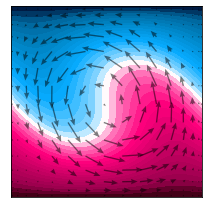

Nubot: 1.471973e+00
Nutop: 1.471973e+00
Nuvol: 1.504239e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 6.2230e-01 -6.7604e-01j
   4: 0.0000e+00 -5.5603e-01j
   3: -3.9746e-01 -2.3419e-01j
   2: 3.9746e-01 -2.3419e-01j
   1: 0.0000e+00 -8.6184e-02j


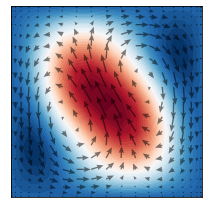

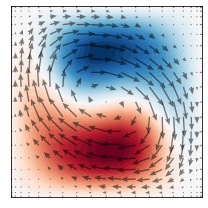

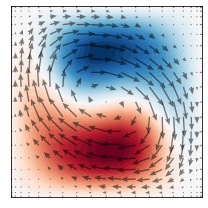

Stability calculation finished!


In [9]:
Ra=Ra_lim[0]
NS = rbc2d.NavierStokes(
        Ra=Ra,
        **ns_settings,
)

NS.set_temperature(amplitude=0.04)

# Simulate
NS.iterate(60)
NS.plot()
Nu, Nuv = NS.eval_Nu()

# Steady State
#sol = NS.solve_steady_state(X0=None,
#                            **ne_settings
#                           )

# Stability analysis
evals, evecs = NS.solve_stability(**st_settings)

## Explore Ra

*** Ra = 1.01e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0027562; step 1
1:  |F(x)| = 0.00245773; step 0.0682573
2:  |F(x)| = 0.00255789; step 0.32149
3:  |F(x)| = 0.00135451; step 1
4:  |F(x)| = 0.00140665; step 0.12777
5:  |F(x)| = 0.0012866; step 0.174497
6:  |F(x)| = 0.0011266; step 0.0241897
7:  |F(x)| = 0.000996873; step 0.134146
8:  |F(x)| = 0.000848348; step 0.124793
9:  |F(x)| = 0.000711317; step 0.326629
10:  |F(x)| = 0.000305878; step 1
11:  |F(x)| = 7.00595e-05; step 1
12:  |F(x)| = 6.89129e-05; step 0.00687002
13:  |F(x)| = 5.78666e-05; step 1
14:  |F(x)| = 1.13428e-05; step 1
15:  |F(x)| = 6.3435e-06; step 1
16:  |F(x)| = 6.13206e-07; step 1
17:  |F(x)| = 1.28612e-07; step 1
18:  |F(x)| = 1.63375e-08; step 1
19:  |F(x)| = 3.02441e-09; step 1


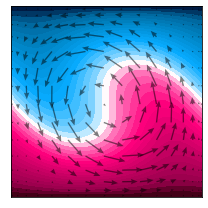

Nubot: 1.478509e+00
Nutop: 1.478509e+00
Nuvol: 1.510988e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 6.2802e-01 -6.7166e-01j
   4: 0.0000e+00 -5.5309e-01j
   3: -4.0103e-01 -2.3330e-01j
   2: 4.0103e-01 -2.3330e-01j
   1: 0.0000e+00 -8.5545e-02j


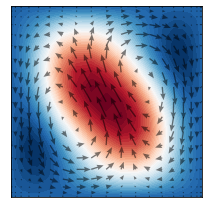

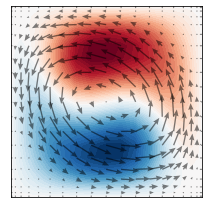

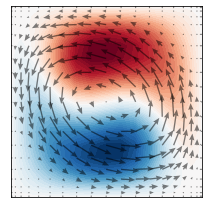

Stability calculation finished!
Write linear/Ra1.01e+04_T.h5 ...
Write linear/Ra1.01e+04_U.h5 ...
Write linear/Ra1.01e+04_V.h5 ...
Write linear/Ra1.01e+04_P.h5 ...
*** Ra = 1.06e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0316839; step 1
1:  |F(x)| = 0.0478465; step 1
2:  |F(x)| = 0.0481698; step 1
3:  |F(x)| = 0.0177697; step 1
4:  |F(x)| = 0.0122646; step 0.357155
5:  |F(x)| = 0.00364829; step 1
6:  |F(x)| = 0.00340862; step 0.12058
7:  |F(x)| = 0.00257018; step 1
8:  |F(x)| = 0.00245863; step 0.0221585
9:  |F(x)| = 0.00189813; step 0.131689
10:  |F(x)| = 0.00174433; step 0.0544812
11:  |F(x)| = 0.00115885; step 0.223246
12:  |F(x)| = 0.00116181; step 0.00717299
13:  |F(x)| = 0.00120481; step 0.43994
14:  |F(x)| = 0.000358255; step 1
15:  |F(x)| = 0.000511176; step 1
16:  |F(x)| = 0.000234306; step 1
17:  |F(x)| = 0.000182652; step 0.28223
18:  |F(x)| = 0.000231324; step 1
19:  |F(x)| = 3.48992e-05; step 1
20:  |F(x)| = 1.5728e-05; step 1
21:  |F(x)| = 7.81327e-06; step 1
22:  |F(x)| =

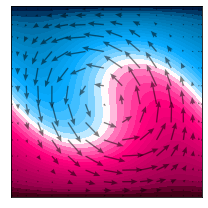

Nubot: 1.504284e+00
Nutop: 1.504284e+00
Nuvol: 1.537568e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 6.4997e-01 -6.5436e-01j
   4: 0.0000e+00 -5.4158e-01j
   3: -4.1464e-01 -2.2982e-01j
   2: 4.1464e-01 -2.2982e-01j
   1: 0.0000e+00 -8.3009e-02j


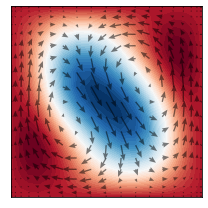

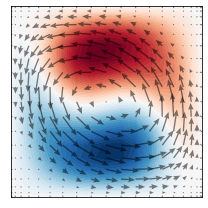

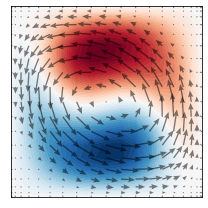

Stability calculation finished!
Write linear/Ra1.06e+04_T.h5 ...
Write linear/Ra1.06e+04_U.h5 ...
Write linear/Ra1.06e+04_V.h5 ...
Write linear/Ra1.06e+04_P.h5 ...
*** Ra = 1.11e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0246671; step 1
1:  |F(x)| = 0.0414252; step 1
2:  |F(x)| = 0.0416982; step 1
3:  |F(x)| = 0.0211887; step 1
4:  |F(x)| = 0.0148726; step 0.290434
5:  |F(x)| = 0.0135745; step 0.32346
6:  |F(x)| = 0.00415784; step 1
7:  |F(x)| = 0.001754; step 1
8:  |F(x)| = 0.00171822; step 0.00160829
9:  |F(x)| = 0.00115944; step 0.382368
10:  |F(x)| = 0.00116206; step 0.020883
11:  |F(x)| = 0.00113652; step 0.187329
12:  |F(x)| = 0.000740447; step 1
13:  |F(x)| = 0.000517285; step 0.0986694
14:  |F(x)| = 0.000343834; step 0.15828
15:  |F(x)| = 0.000234845; step 0.25868
16:  |F(x)| = 0.000201813; step 0.146155
17:  |F(x)| = 0.000131264; step 0.23732
18:  |F(x)| = 0.000102796; step 0.330165
19:  |F(x)| = 8.67649e-05; step 1
20:  |F(x)| = 0.000262806; step 1
21:  |F(x)| = 0.000217529; s

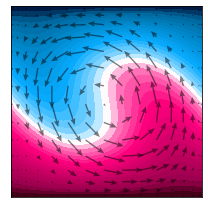

Nubot: 1.529517e+00
Nutop: 1.529517e+00
Nuvol: 1.563520e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 6.7059e-01 -6.3741e-01j
   4: 0.0000e+00 -5.3043e-01j
   3: -4.2728e-01 -2.2643e-01j
   2: 4.2728e-01 -2.2643e-01j
   1: 0.0000e+00 -8.0507e-02j


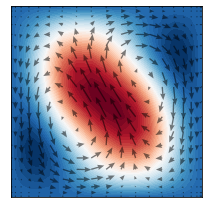

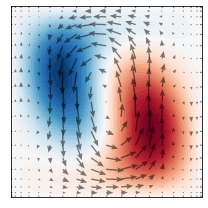

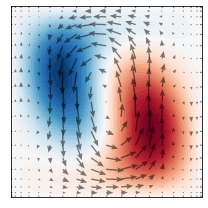

Stability calculation finished!
Write linear/Ra1.11e+04_T.h5 ...
Write linear/Ra1.11e+04_U.h5 ...
Write linear/Ra1.11e+04_V.h5 ...
Write linear/Ra1.11e+04_P.h5 ...
*** Ra = 1.16e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0190894; step 1
1:  |F(x)| = 0.036129; step 1
2:  |F(x)| = 0.0363599; step 1
3:  |F(x)| = 0.0181523; step 1
4:  |F(x)| = 0.0145606; step 1
5:  |F(x)| = 0.010948; step 0.218338
6:  |F(x)| = 0.00514141; step 1
7:  |F(x)| = 0.00290157; step 1
8:  |F(x)| = 0.00251024; step 1
9:  |F(x)| = 0.00194334; step 1
10:  |F(x)| = 0.00160193; step 0.462679
11:  |F(x)| = 0.00120787; step 0.434206
12:  |F(x)| = 0.00107382; step 0.153483
13:  |F(x)| = 0.000855631; step 0.412038
14:  |F(x)| = 0.000437698; step 1
15:  |F(x)| = 0.000423722; step 0.0107954
16:  |F(x)| = 0.000286953; step 0.196294
17:  |F(x)| = 0.000465588; step 1
18:  |F(x)| = 0.000689522; step 1
19:  |F(x)| = 0.000442478; step 1
20:  |F(x)| = 0.000285837; step 1
21:  |F(x)| = 0.000593166; step 1
22:  |F(x)| = 0.000640525; s

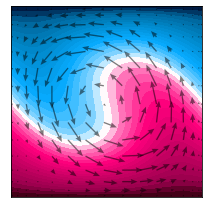

Nubot: 1.554246e+00
Nutop: 1.554246e+00
Nuvol: 1.588889e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 6.9004e-01 -6.2079e-01j
   4: 0.0000e+00 -5.1963e-01j
   3: -4.3909e-01 -2.2312e-01j
   2: 4.3909e-01 -2.2312e-01j
   1: 0.0000e+00 -7.8039e-02j


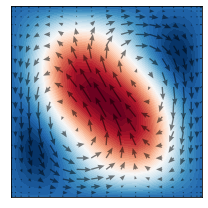

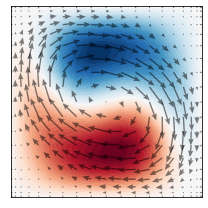

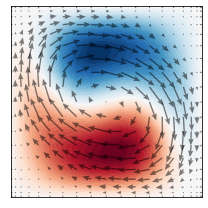

Stability calculation finished!
Write linear/Ra1.16e+04_T.h5 ...
Write linear/Ra1.16e+04_U.h5 ...
Write linear/Ra1.16e+04_V.h5 ...
Write linear/Ra1.16e+04_P.h5 ...
*** Ra = 1.22e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0148167; step 1
1:  |F(x)| = 0.0325973; step 1
2:  |F(x)| = 0.0339488; step 1
3:  |F(x)| = 0.027669; step 1
4:  |F(x)| = 0.0110799; step 1
5:  |F(x)| = 0.0103915; step 0.311357
6:  |F(x)| = 0.00716687; step 1
7:  |F(x)| = 0.00208333; step 1
8:  |F(x)| = 0.00197183; step 0.0810218
9:  |F(x)| = 0.00138414; step 0.409336
10:  |F(x)| = 0.00143887; step 0.0715031
11:  |F(x)| = 0.00167021; step 1
12:  |F(x)| = 0.00158889; step 0.00848483
13:  |F(x)| = 0.000985137; step 1
14:  |F(x)| = 0.000700817; step 0.173777
15:  |F(x)| = 0.00153023; step 1
16:  |F(x)| = 0.000328293; step 1
17:  |F(x)| = 5.90437e-05; step 1
18:  |F(x)| = 3.57756e-05; step 1
19:  |F(x)| = 0.000254118; step 1
20:  |F(x)| = 9.13282e-05; step 1
21:  |F(x)| = 1.40891e-05; step 1
22:  |F(x)| = 7.19023e-07; step 

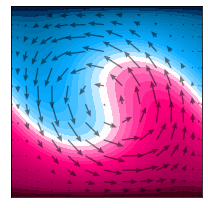

Nubot: 1.578508e+00
Nutop: 1.578508e+00
Nuvol: 1.613717e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.0846e-01 -6.0450e-01j
   4: 0.0000e+00 -5.0916e-01j
   3: -4.5016e-01 -2.1987e-01j
   2: 4.5016e-01 -2.1987e-01j
   1: 0.0000e+00 -7.5601e-02j


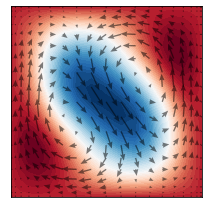

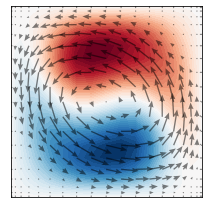

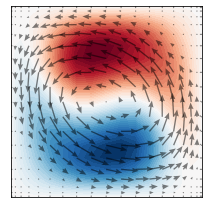

Stability calculation finished!
Write linear/Ra1.22e+04_T.h5 ...
Write linear/Ra1.22e+04_U.h5 ...
Write linear/Ra1.22e+04_V.h5 ...
Write linear/Ra1.22e+04_P.h5 ...
*** Ra = 1.28e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0112607; step 1
1:  |F(x)| = 0.0229128; step 1
2:  |F(x)| = 0.0335962; step 1
3:  |F(x)| = 0.0317642; step 1
4:  |F(x)| = 0.0175705; step 1
5:  |F(x)| = 0.00898157; step 1
6:  |F(x)| = 0.0082157; step 1
7:  |F(x)| = 0.00539997; step 0.491577
8:  |F(x)| = 0.00528296; step 0.163325
9:  |F(x)| = 0.00378452; step 0.280959
10:  |F(x)| = 0.00164804; step 1
11:  |F(x)| = 0.0194978; step 1
12:  |F(x)| = 0.00963988; step 1
13:  |F(x)| = 0.0020118; step 1
14:  |F(x)| = 0.0112205; step 1
15:  |F(x)| = 0.00367767; step 1
16:  |F(x)| = 0.00607731; step 1
17:  |F(x)| = 0.00295714; step 1
18:  |F(x)| = 0.00192885; step 0.299119
19:  |F(x)| = 0.00139704; step 0.347167
20:  |F(x)| = 0.00111152; step 1
21:  |F(x)| = 0.00105809; step 0.046792
22:  |F(x)| = 0.000908392; step 0.0491757
23: 

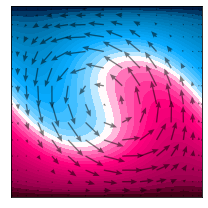

Nubot: 1.602338e+00
Nutop: 1.602338e+00
Nuvol: 1.638045e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.2595e-01 -5.8852e-01j
   4: 0.0000e+00 -4.9901e-01j
   3: -4.6059e-01 -2.1665e-01j
   2: 4.6059e-01 -2.1665e-01j
   1: 0.0000e+00 -7.3192e-02j


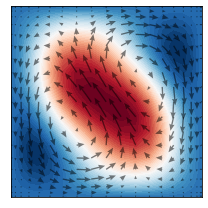

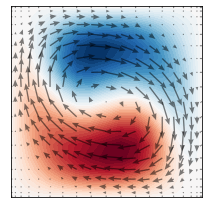

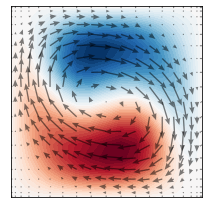

Stability calculation finished!
Write linear/Ra1.28e+04_T.h5 ...
Write linear/Ra1.28e+04_U.h5 ...
Write linear/Ra1.28e+04_V.h5 ...
Write linear/Ra1.28e+04_P.h5 ...
*** Ra = 1.34e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00867787; step 1
1:  |F(x)| = 0.0218581; step 1
2:  |F(x)| = 0.0276758; step 1
3:  |F(x)| = 0.0259; step 1
4:  |F(x)| = 0.0149407; step 1
5:  |F(x)| = 0.00523652; step 1
6:  |F(x)| = 0.00411957; step 1
7:  |F(x)| = 0.00350487; step 0.186029
8:  |F(x)| = 0.00345856; step 0.113107
9:  |F(x)| = 0.00259732; step 0.296043
10:  |F(x)| = 0.00194703; step 0.253925
11:  |F(x)| = 0.00168117; step 1
12:  |F(x)| = 0.00202897; step 1
13:  |F(x)| = 0.00243901; step 0.288347
14:  |F(x)| = 0.00144606; step 1
15:  |F(x)| = 0.00110658; step 1
16:  |F(x)| = 0.000518209; step 1
17:  |F(x)| = 0.000153133; step 1
18:  |F(x)| = 8.23978e-05; step 1
19:  |F(x)| = 7.85008e-05; step 0.41815
20:  |F(x)| = 3.39434e-05; step 1
21:  |F(x)| = 1.44152e-05; step 1
22:  |F(x)| = 6.42848e-06; step 1
23:  

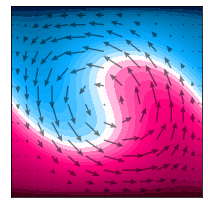

Nubot: 1.625772e+00
Nutop: 1.625772e+00
Nuvol: 1.661910e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.4259e-01 -5.7283e-01j
   4: 0.0000e+00 -4.8916e-01j
   3: -4.7044e-01 -2.1344e-01j
   2: 4.7044e-01 -2.1344e-01j
   1: 0.0000e+00 -7.0811e-02j


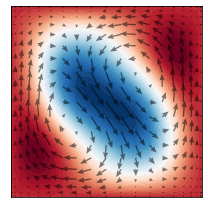

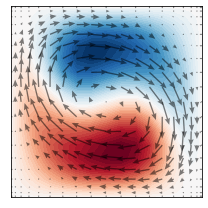

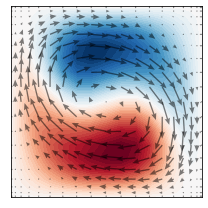

Stability calculation finished!
Write linear/Ra1.34e+04_T.h5 ...
Write linear/Ra1.34e+04_U.h5 ...
Write linear/Ra1.34e+04_V.h5 ...
Write linear/Ra1.34e+04_P.h5 ...
*** Ra = 1.40e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00627659; step 1
1:  |F(x)| = 0.025027; step 1
2:  |F(x)| = 0.0284193; step 1
3:  |F(x)| = 0.0287496; step 1
4:  |F(x)| = 0.021305; step 0.219465
5:  |F(x)| = 0.00985791; step 0.445401
6:  |F(x)| = 0.00515931; step 1
7:  |F(x)| = 0.00319329; step 1
8:  |F(x)| = 0.00128873; step 1
9:  |F(x)| = 0.00128049; step 0.0174676
10:  |F(x)| = 0.000776098; step 0.497311
11:  |F(x)| = 0.000686859; step 0.277744
12:  |F(x)| = 0.000687704; step 1
13:  |F(x)| = 0.000331482; step 1
14:  |F(x)| = 0.000112534; step 1
15:  |F(x)| = 0.000143098; step 0.492584
16:  |F(x)| = 8.89172e-05; step 1
17:  |F(x)| = 0.000124038; step 1
18:  |F(x)| = 8.47943e-05; step 1
19:  |F(x)| = 4.25097e-05; step 1
20:  |F(x)| = 1.56773e-06; step 1
21:  |F(x)| = 2.15474e-07; step 1
22:  |F(x)| = 1.77006e-08; ste

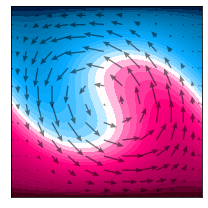

Nubot: 1.648845e+00
Nutop: 1.648845e+00
Nuvol: 1.685350e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.5847e-01 -5.5742e-01j
   4: 0.0000e+00 -4.7960e-01j
   3: -4.7977e-01 -2.1024e-01j
   2: 4.7977e-01 -2.1024e-01j
   1: 0.0000e+00 -6.8456e-02j


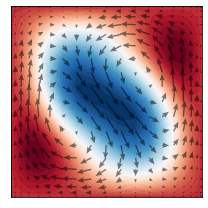

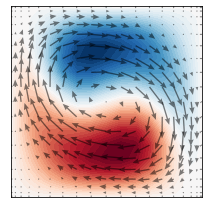

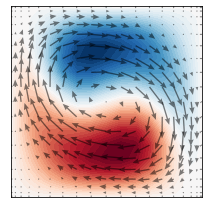

Stability calculation finished!
Write linear/Ra1.40e+04_T.h5 ...
Write linear/Ra1.40e+04_U.h5 ...
Write linear/Ra1.40e+04_V.h5 ...
Write linear/Ra1.40e+04_P.h5 ...
*** Ra = 1.46e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00493191; step 1
1:  |F(x)| = 0.019384; step 1
2:  |F(x)| = 0.0191592; step 0.438509
3:  |F(x)| = 0.0146269; step 0.341136
4:  |F(x)| = 0.0124509; step 0.436548
5:  |F(x)| = 0.0076499; step 1
6:  |F(x)| = 0.0069666; step 1
7:  |F(x)| = 0.00494447; step 0.303984
8:  |F(x)| = 0.00480287; step 0.10591
9:  |F(x)| = 0.0048247; step 0.0153702
10:  |F(x)| = 0.00868837; step 1
11:  |F(x)| = 0.00780445; step 0.232378
12:  |F(x)| = 0.00514883; step 1
13:  |F(x)| = 0.00503784; step 0.0391216
14:  |F(x)| = 0.00392968; step 0.152134
15:  |F(x)| = 0.00357556; step 1
16:  |F(x)| = 0.00430544; step 0.0563222
17:  |F(x)| = 0.0130418; step 1
18:  |F(x)| = 0.00803876; step 1
19:  |F(x)| = 0.00302907; step 0.366447
20:  |F(x)| = 0.00264058; step 1
21:  |F(x)| = 0.000938453; step 1
22:  |F(

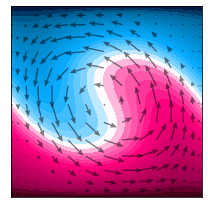

Nubot: 1.671591e+00
Nutop: 1.671591e+00
Nuvol: 1.708399e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.7363e-01 -5.4226e-01j
   4: 0.0000e+00 -4.7033e-01j
   3: -4.8862e-01 -2.0700e-01j
   2: 4.8862e-01 -2.0700e-01j
   1: 0.0000e+00 -6.6127e-02j


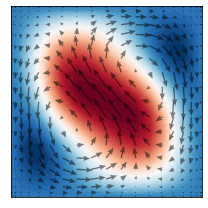

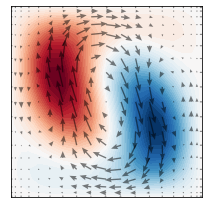

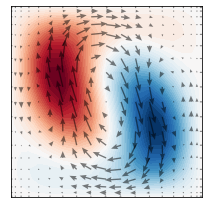

Stability calculation finished!
Write linear/Ra1.46e+04_T.h5 ...
Write linear/Ra1.46e+04_U.h5 ...
Write linear/Ra1.46e+04_V.h5 ...
Write linear/Ra1.46e+04_P.h5 ...
*** Ra = 1.53e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0034544; step 1
1:  |F(x)| = 0.0044869; step 1
2:  |F(x)| = 0.00445746; step 0.433175
3:  |F(x)| = 0.0197459; step 1
4:  |F(x)| = 0.0183574; step 0.0785993
5:  |F(x)| = 0.00692441; step 1
6:  |F(x)| = 0.0746118; step 1
7:  |F(x)| = 0.0746565; step 1
8:  |F(x)| = 0.0746718; step 1
9:  |F(x)| = 0.0755183; step 1
10:  |F(x)| = 0.0580715; step 1
11:  |F(x)| = 0.0512761; step 1
12:  |F(x)| = 0.0270851; step 1
13:  |F(x)| = 0.00833474; step 1
14:  |F(x)| = 0.00409592; step 1
15:  |F(x)| = 0.0030775; step 1
16:  |F(x)| = 0.00212266; step 0.335389
17:  |F(x)| = 0.00131368; step 1
18:  |F(x)| = 0.00050789; step 1
19:  |F(x)| = 0.000458746; step 0.0599228
20:  |F(x)| = 0.000993835; step 0.260436
21:  |F(x)| = 0.00022383; step 0.328959
22:  |F(x)| = 0.000111575; step 1
23:  |F(x)|

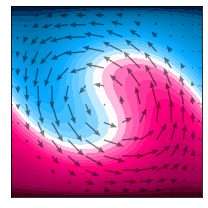

Nubot: 1.694042e+00
Nutop: 1.694042e+00
Nuvol: 1.731090e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 7.8813e-01 -5.2736e-01j
   4: 0.0000e+00 -4.6133e-01j
   3: -4.9702e-01 -2.0374e-01j
   2: 4.9702e-01 -2.0374e-01j
   1: 0.0000e+00 -6.3824e-02j


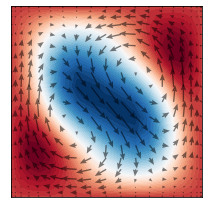

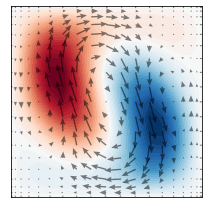

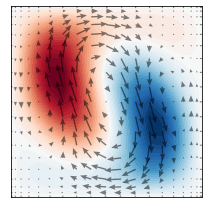

Stability calculation finished!
Write linear/Ra1.53e+04_T.h5 ...
Write linear/Ra1.53e+04_U.h5 ...
Write linear/Ra1.53e+04_V.h5 ...
Write linear/Ra1.53e+04_P.h5 ...
*** Ra = 1.61e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00297952; step 1
1:  |F(x)| = 0.0182483; step 1
2:  |F(x)| = 0.0336276; step 1
3:  |F(x)| = 0.0476711; step 1
4:  |F(x)| = 0.0478108; step 1
5:  |F(x)| = 0.0233526; step 1
6:  |F(x)| = 0.00982799; step 1
7:  |F(x)| = 0.00480811; step 0.421109
8:  |F(x)| = 0.00174086; step 1
9:  |F(x)| = 0.00212267; step 1
10:  |F(x)| = 0.000533616; step 1
11:  |F(x)| = 0.000247622; step 1
12:  |F(x)| = 0.000154894; step 1
13:  |F(x)| = 0.000141897; step 0.235625
14:  |F(x)| = 0.000166199; step 1
15:  |F(x)| = 0.000102636; step 1
16:  |F(x)| = 4.13847e-05; step 1
17:  |F(x)| = 9.7104e-06; step 1
18:  |F(x)| = 1.13938e-06; step 1
19:  |F(x)| = 6.76279e-08; step 1
20:  |F(x)| = 1.44495e-09; step 1


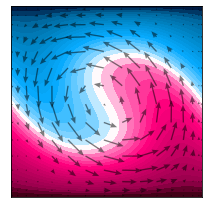

Nubot: 1.716233e+00
Nutop: 1.716233e+00
Nuvol: 1.753453e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.0200e-01 -5.1268e-01j
   4: 0.0000e+00 -4.5259e-01j
   3: -5.0501e-01 -2.0042e-01j
   2: 5.0501e-01 -2.0042e-01j
   1: 0.0000e+00 -6.1546e-02j


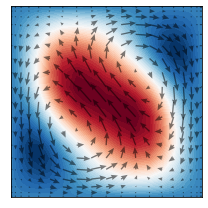

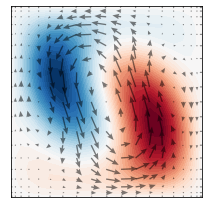

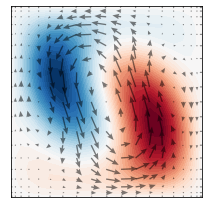

Stability calculation finished!
Write linear/Ra1.61e+04_T.h5 ...
Write linear/Ra1.61e+04_U.h5 ...
Write linear/Ra1.61e+04_V.h5 ...
Write linear/Ra1.61e+04_P.h5 ...
*** Ra = 1.68e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00344085; step 1
1:  |F(x)| = 0.0222714; step 1
2:  |F(x)| = 0.0318583; step 1
3:  |F(x)| = 0.031939; step 1
4:  |F(x)| = 0.0289091; step 0.119352
5:  |F(x)| = 0.024385; step 0.438076
6:  |F(x)| = 0.0152105; step 0.402744
7:  |F(x)| = 0.00693797; step 1
8:  |F(x)| = 0.0067439; step 1
9:  |F(x)| = 0.00406044; step 1
10:  |F(x)| = 0.00231733; step 1
11:  |F(x)| = 0.00234106; step 0.0663995
12:  |F(x)| = 0.00233968; step 1
13:  |F(x)| = 0.000500753; step 1
14:  |F(x)| = 0.000135617; step 1
15:  |F(x)| = 1.93304e-05; step 1
16:  |F(x)| = 9.04421e-06; step 1
17:  |F(x)| = 2.12831e-06; step 0.324906
18:  |F(x)| = 1.43094e-06; step 1
19:  |F(x)| = 1.5929e-07; step 1
20:  |F(x)| = 1.05062e-08; step 1
21:  |F(x)| = 6.69544e-09; step 1


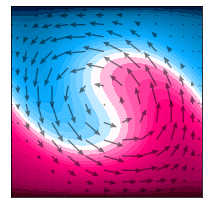

Nubot: 1.738193e+00
Nutop: 1.738193e+00
Nuvol: 1.775520e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.1528e-01 -4.9823e-01j
   4: 0.0000e+00 -4.4410e-01j
   3: 5.1260e-01 -1.9705e-01j
   2: -5.1260e-01 -1.9705e-01j
   1: 0.0000e+00 -5.9293e-02j


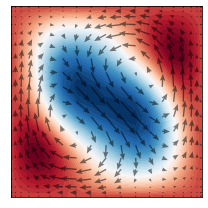

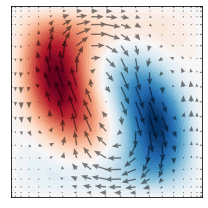

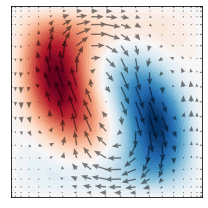

Stability calculation finished!
Write linear/Ra1.68e+04_T.h5 ...
Write linear/Ra1.68e+04_U.h5 ...
Write linear/Ra1.68e+04_V.h5 ...
Write linear/Ra1.68e+04_P.h5 ...
*** Ra = 1.76e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00455482; step 1
1:  |F(x)| = 0.0767166; step 1
2:  |F(x)| = 0.0775219; step 1
3:  |F(x)| = 0.056769; step 1
4:  |F(x)| = 0.0565992; step 1
5:  |F(x)| = 0.0418135; step 1
6:  |F(x)| = 0.0151974; step 1
7:  |F(x)| = 0.00444214; step 1
8:  |F(x)| = 0.00272753; step 0.418505
9:  |F(x)| = 0.00361305; step 1
10:  |F(x)| = 0.00249228; step 0.361451
11:  |F(x)| = 0.00163704; step 0.299154
12:  |F(x)| = 0.000747335; step 1
13:  |F(x)| = 0.000253545; step 1
14:  |F(x)| = 5.67326e-05; step 1
15:  |F(x)| = 5.81271e-05; step 1
16:  |F(x)| = 3.98422e-05; step 1
17:  |F(x)| = 4.29113e-05; step 0.139217
18:  |F(x)| = 4.06324e-05; step 0.00365714
19:  |F(x)| = 4.27382e-06; step 1
20:  |F(x)| = 1.51008e-06; step 1
21:  |F(x)| = 1.7658e-07; step 1
22:  |F(x)| = 2.85375e-08; step 1
23:  |

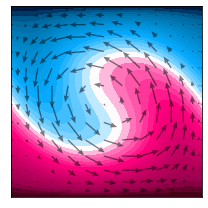

Nubot: 1.759956e+00
Nutop: 1.759956e+00
Nuvol: 1.797318e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.2798e-01 -4.8399e-01j
   4: 0.0000e+00 -4.3585e-01j
   3: 5.1981e-01 -1.9360e-01j
   2: -5.1981e-01 -1.9360e-01j
   1: 0.0000e+00 -5.7064e-02j


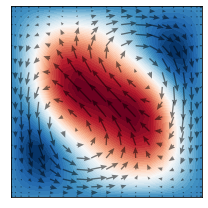

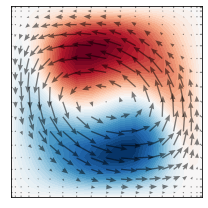

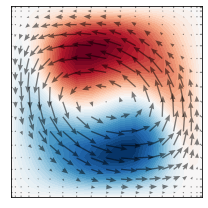

Stability calculation finished!
Write linear/Ra1.76e+04_T.h5 ...
Write linear/Ra1.76e+04_U.h5 ...
Write linear/Ra1.76e+04_V.h5 ...
Write linear/Ra1.76e+04_P.h5 ...
*** Ra = 1.85e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00520143; step 1
1:  |F(x)| = 0.0385616; step 1
2:  |F(x)| = 0.0392281; step 1
3:  |F(x)| = 0.0303543; step 0.442876
4:  |F(x)| = 0.027371; step 1
5:  |F(x)| = 0.0504718; step 1
6:  |F(x)| = 0.050746; step 1
7:  |F(x)| = 0.0220669; step 1
8:  |F(x)| = 0.0131088; step 0.253241
9:  |F(x)| = 0.00757212; step 1
10:  |F(x)| = 0.00442679; step 1
11:  |F(x)| = 0.00291142; step 0.235863
12:  |F(x)| = 0.0039018; step 1
13:  |F(x)| = 0.00146742; step 1
14:  |F(x)| = 0.00132126; step 0.0161894
15:  |F(x)| = 0.000774009; step 0.204314
16:  |F(x)| = 0.000694203; step 0.0754584
17:  |F(x)| = 0.000601516; step 0.17591
18:  |F(x)| = 0.000528637; step 0.342229
19:  |F(x)| = 0.00113048; step 1
20:  |F(x)| = 0.000802748; step 1
21:  |F(x)| = 0.000802913; step 1
22:  |F(x)| = 0.000406304; 

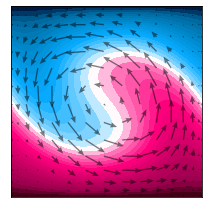

Nubot: 1.781550e+00
Nutop: 1.781550e+00
Nuvol: 1.818874e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.4012e-01 -4.6996e-01j
   4: 0.0000e+00 -4.2784e-01j
   3: 5.2665e-01 -1.9009e-01j
   2: -5.2665e-01 -1.9009e-01j
   1: 0.0000e+00 -5.4860e-02j


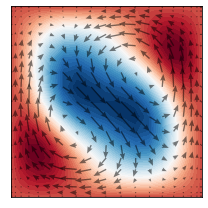

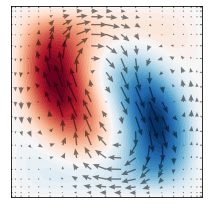

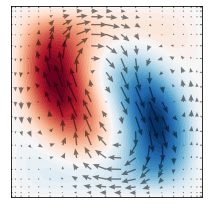

Stability calculation finished!
Write linear/Ra1.85e+04_T.h5 ...
Write linear/Ra1.85e+04_U.h5 ...
Write linear/Ra1.85e+04_V.h5 ...
Write linear/Ra1.85e+04_P.h5 ...
*** Ra = 1.93e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00310083; step 1
1:  |F(x)| = 0.0227148; step 1
2:  |F(x)| = 0.0230724; step 1
3:  |F(x)| = 0.0181771; step 1
4:  |F(x)| = 0.0199762; step 1
5:  |F(x)| = 0.0168976; step 0.147419
6:  |F(x)| = 0.00573468; step 1
7:  |F(x)| = 0.0055315; step 0.212213
8:  |F(x)| = 0.00563783; step 0.412916
9:  |F(x)| = 0.00574835; step 0.303914
10:  |F(x)| = 0.00447742; step 0.345073
11:  |F(x)| = 0.00432797; step 0.0771109
12:  |F(x)| = 0.00390618; step 1
13:  |F(x)| = 0.00410134; step 0.149351
14:  |F(x)| = 0.00287238; step 1
15:  |F(x)| = 0.00168505; step 0.303775
16:  |F(x)| = 0.0163577; step 1
17:  |F(x)| = 0.00623753; step 1
18:  |F(x)| = 0.00674118; step 0.0478648
19:  |F(x)| = 0.0993381; step 1
20:  |F(x)| = 0.0698318; step 1
21:  |F(x)| = 0.0188246; step 1
22:  |F(x)| = 0.00528894

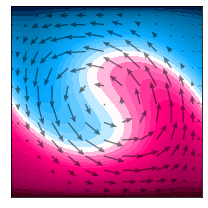

Nubot: 1.803005e+00
Nutop: 1.803005e+00
Nuvol: 1.840213e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.5172e-01 -4.5613e-01j
   4: 0.0000e+00 -4.2005e-01j
   3: 5.3313e-01 -1.8649e-01j
   2: -5.3313e-01 -1.8649e-01j
   1: 0.0000e+00 -5.2681e-02j


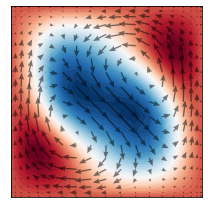

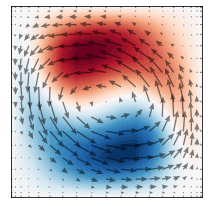

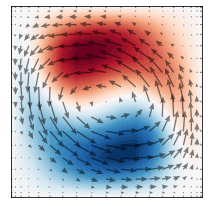

Stability calculation finished!
Write linear/Ra1.93e+04_T.h5 ...
Write linear/Ra1.93e+04_U.h5 ...
Write linear/Ra1.93e+04_V.h5 ...
Write linear/Ra1.93e+04_P.h5 ...
*** Ra = 2.03e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00474971; step 1
1:  |F(x)| = 0.0421072; step 1
2:  |F(x)| = 0.0430411; step 1
3:  |F(x)| = 0.0348173; step 0.493705
4:  |F(x)| = 0.0225449; step 1
5:  |F(x)| = 0.0185395; step 0.44931
6:  |F(x)| = 0.0113104; step 1
7:  |F(x)| = 0.00725196; step 0.254396
8:  |F(x)| = 0.0354333; step 1
9:  |F(x)| = 0.0355858; step 1
10:  |F(x)| = 0.0167719; step 1
11:  |F(x)| = 0.0169594; step 0.0238648
12:  |F(x)| = 0.00897054; step 1
13:  |F(x)| = 0.00607435; step 1
14:  |F(x)| = 0.00271528; step 1
15:  |F(x)| = 0.022752; step 1
16:  |F(x)| = 0.0088553; step 1
17:  |F(x)| = 0.00472603; step 1
18:  |F(x)| = 0.00380102; step 0.122522
19:  |F(x)| = 0.000856977; step 1
20:  |F(x)| = 0.000561065; step 0.354251
21:  |F(x)| = 0.000392738; step 1
22:  |F(x)| = 0.000345824; step 1
23:  |F(x)| =

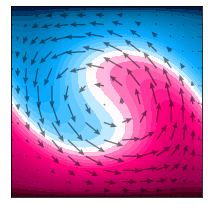

Nubot: 1.824349e+00
Nutop: 1.824349e+00
Nuvol: 1.861359e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.6278e-01 -4.4252e-01j
   4: 0.0000e+00 -4.1248e-01j
   3: 5.3925e-01 -1.8283e-01j
   2: -5.3925e-01 -1.8283e-01j
   1: 0.0000e+00 -5.0526e-02j


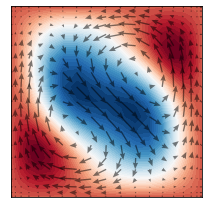

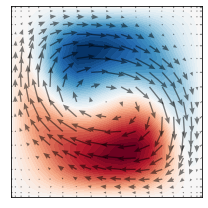

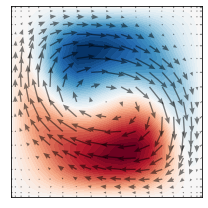

Stability calculation finished!
Write linear/Ra2.03e+04_T.h5 ...
Write linear/Ra2.03e+04_U.h5 ...
Write linear/Ra2.03e+04_V.h5 ...
Write linear/Ra2.03e+04_P.h5 ...
*** Ra = 2.12e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0040319; step 1
1:  |F(x)| = 0.0883974; step 1
2:  |F(x)| = 0.0892202; step 1
3:  |F(x)| = 0.065688; step 1
4:  |F(x)| = 0.0654605; step 1
5:  |F(x)| = 0.0648519; step 1
6:  |F(x)| = 0.0649799; step 1
7:  |F(x)| = 0.0635258; step 1
8:  |F(x)| = 0.0637584; step 1
9:  |F(x)| = 0.0619993; step 1
10:  |F(x)| = 0.0621928; step 1
11:  |F(x)| = 0.0597454; step 1
12:  |F(x)| = 0.0555316; step 1
13:  |F(x)| = 0.0746339; step 1
14:  |F(x)| = 0.0748393; step 1
15:  |F(x)| = 0.0576472; step 1
16:  |F(x)| = 0.0572654; step 1
17:  |F(x)| = 0.0631055; step 1
18:  |F(x)| = 0.0632199; step 1
19:  |F(x)| = 0.0324896; step 1
20:  |F(x)| = 0.0109077; step 1
21:  |F(x)| = 0.00911595; step 1
22:  |F(x)| = 0.00203667; step 1
23:  |F(x)| = 0.000840296; step 1
24:  |F(x)| = 0.000106949; step 1


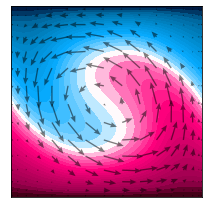

Nubot: 1.845610e+00
Nutop: 1.845610e+00
Nuvol: 1.882332e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.7333e-01 -4.2913e-01j
   4: 0.0000e+00 -4.0511e-01j
   3: 5.4502e-01 -1.7910e-01j
   2: -5.4502e-01 -1.7910e-01j
   1: 0.0000e+00 -4.8395e-02j


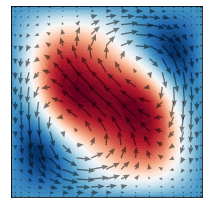

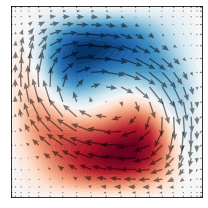

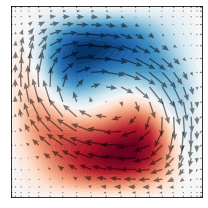

Stability calculation finished!
Write linear/Ra2.12e+04_T.h5 ...
Write linear/Ra2.12e+04_U.h5 ...
Write linear/Ra2.12e+04_V.h5 ...
Write linear/Ra2.12e+04_P.h5 ...
*** Ra = 2.22e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00378338; step 1
1:  |F(x)| = 0.00487586; step 1
2:  |F(x)| = 0.00421381; step 0.384734
3:  |F(x)| = 0.00399198; step 0.0703171
4:  |F(x)| = 0.00392954; step 0.0139092
5:  |F(x)| = 0.0027282; step 0.374693
6:  |F(x)| = 0.00259679; step 0.0861031
7:  |F(x)| = 0.00260874; step 0.0416426
8:  |F(x)| = 0.00235939; step 1
9:  |F(x)| = 0.00191658; step 0.342974
10:  |F(x)| = 0.00372125; step 1
11:  |F(x)| = 0.00525022; step 1
12:  |F(x)| = 0.00531799; step 1
13:  |F(x)| = 0.00542829; step 1
14:  |F(x)| = 0.00957475; step 1
15:  |F(x)| = 0.00753964; step 1
16:  |F(x)| = 0.0058329; step 1
17:  |F(x)| = 0.00200462; step 1
18:  |F(x)| = 0.00160363; step 0.103118
19:  |F(x)| = 0.000929532; step 0.155136
20:  |F(x)| = 0.000709587; step 0.0399415
21:  |F(x)| = 0.000378215; step 0.121

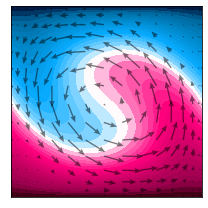

Nubot: 1.866812e+00
Nutop: 1.866812e+00
Nuvol: 1.903154e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.8336e-01 -4.1595e-01j
   4: 0.0000e+00 -3.9794e-01j
   3: 5.5044e-01 -1.7530e-01j
   2: -5.5044e-01 -1.7530e-01j
   1: 0.0000e+00 -4.6288e-02j


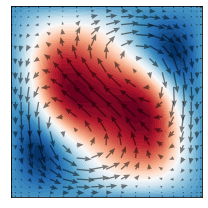

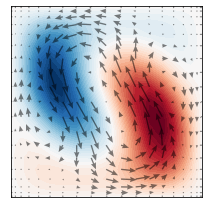

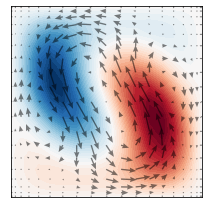

Stability calculation finished!
Write linear/Ra2.22e+04_T.h5 ...
Write linear/Ra2.22e+04_U.h5 ...
Write linear/Ra2.22e+04_V.h5 ...
Write linear/Ra2.22e+04_P.h5 ...
*** Ra = 2.33e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.00328353; step 1
1:  |F(x)| = 0.0250809; step 1
2:  |F(x)| = 0.0260503; step 1
3:  |F(x)| = 0.0292562; step 0.410989
4:  |F(x)| = 0.0236317; step 0.179422
5:  |F(x)| = 0.0119808; step 1
6:  |F(x)| = 0.0102185; step 0.105275
7:  |F(x)| = 0.00779065; step 0.493385
8:  |F(x)| = 0.00673891; step 0.107818
9:  |F(x)| = 0.0100815; step 1
10:  |F(x)| = 0.00543532; step 1
11:  |F(x)| = 0.0244857; step 1
12:  |F(x)| = 0.0244961; step 1
13:  |F(x)| = 0.0264133; step 1
14:  |F(x)| = 0.020982; step 1
15:  |F(x)| = 0.0228884; step 1
16:  |F(x)| = 0.0127585; step 1
17:  |F(x)| = 0.0117035; step 0.0345055
18:  |F(x)| = 0.00614734; step 0.258262
19:  |F(x)| = 0.00393106; step 0.35298
20:  |F(x)| = 0.00126725; step 1
21:  |F(x)| = 0.000673805; step 0.200266
22:  |F(x)| = 0.000423673; ste

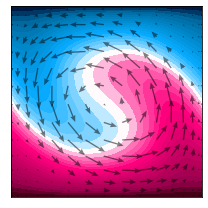

Nubot: 1.887981e+00
Nutop: 1.887981e+00
Nuvol: 1.923843e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 8.9288e-01 -4.0300e-01j
   4: 0.0000e+00 -3.9096e-01j
   3: 5.5551e-01 -1.7144e-01j
   2: -5.5551e-01 -1.7144e-01j
   1: 0.0000e+00 -4.4205e-02j


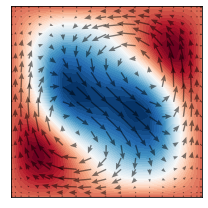

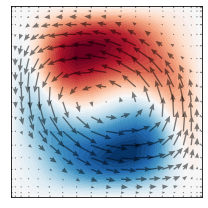

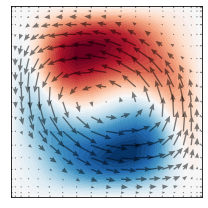

Stability calculation finished!
Write linear/Ra2.33e+04_T.h5 ...
Write linear/Ra2.33e+04_U.h5 ...
Write linear/Ra2.33e+04_V.h5 ...
Write linear/Ra2.33e+04_P.h5 ...
*** Ra = 2.44e+04 ***
Initialize rk3 ...
0:  |F(x)| = 0.0034338; step 1
1:  |F(x)| = 0.00440557; step 1
2:  |F(x)| = 0.00487087; step 0.238202
3:  |F(x)| = 0.0043897; step 0.0966613
4:  |F(x)| = 0.00467898; step 0.0376627
5:  |F(x)| = 0.00217189; step 1
6:  |F(x)| = 0.00122002; step 1
7:  |F(x)| = 0.000537974; step 1
8:  |F(x)| = 0.0001463; step 1
9:  |F(x)| = 6.55623e-05; step 1
10:  |F(x)| = 2.65668e-05; step 0.473925
11:  |F(x)| = 3.04306e-05; step 1
12:  |F(x)| = 3.99856e-06; step 1
13:  |F(x)| = 2.42058e-06; step 1
14:  |F(x)| = 1.94133e-07; step 1
15:  |F(x)| = 1.22668e-08; step 1
16:  |F(x)| = 1.98583e-09; step 1


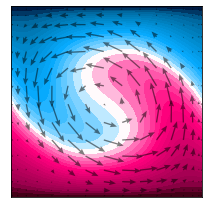

Nubot: 1.909139e+00
Nutop: 1.909139e+00
Nuvol: 1.944415e+00
Solve stability ...
Initialize rk3 ...
   5 largest eigenvalues:
   5: 9.0190e-01 -3.9029e-01j
   4: 0.0000e+00 -3.8417e-01j
   3: 5.6024e-01 -1.6754e-01j
   2: -5.6024e-01 -1.6754e-01j
   1: 0.0000e+00 -4.2146e-02j


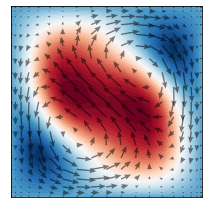

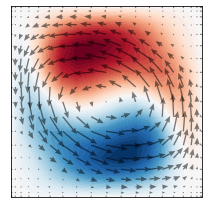

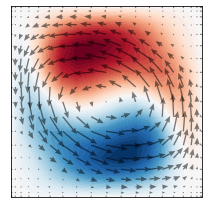

Stability calculation finished!
Write linear/Ra2.44e+04_T.h5 ...
Write linear/Ra2.44e+04_U.h5 ...
Write linear/Ra2.44e+04_V.h5 ...
Write linear/Ra2.44e+04_P.h5 ...
*** Ra = 2.55e+04 ***
Initialize rk3 ...


In [ ]:
def residual(sol):
    return np.linalg.norm(sol.fun)

for Ra in Ra_dict.dict:
    if Ra<Ra_lim[0] or Ra>Ra_lim[1]:
        continue
    
    print("*** Ra = {:6.2e} ***".format(Ra))
    fname = fname_from_Ra(Ra)
    
    if Ra_dict.dict[Ra]:
        print("Ra {:6.2e} already known.".format(Ra))
        # Read
        NS.read(folder+fname, add_time=False)
    
    
    # Update Parameters
    NS.Ra = Ra
    NS.reset(reset_time=True)
    
    # Steady State
    sol = NS.solve_steady_state(X0=None,
                                #maxiter=4,
                                **ne_settings
                               )
    X0 = sol.x
    res = residual(sol)
    
    # Get Nu
    NS.plot()
    Nu,Nuv = NS.eval_Nu()
    
    # Stabilty analysis
    evals, evecs = NS.solve_stability(**st_settings)
    sigma = np.imag(evals[-1])
    
    # Add to dict
    Ra_dict.add(Ra, Nu, Nuv, sigma, res, fname)
    
    # Write to file
    NS.write(folder+fname, add_time=False)
    
    # Write dict
    Ra_dict.save(enforce_overwrite=True)
    

### Some Reading and Writing stuff

In [ ]:
#Ra=Ra_lim[0]

#fname = fname_from_Ra(Ra)
#NS.write(leading_str=fname,add_time=False)